
## 🐍 NYC High School Directory Exploration

## Load & clean data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("high-school-directory.csv")

In [5]:
print("Shape:", df.shape)
display(df.head())

Shape: (435, 69)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## a) Filter for Brooklyn

In [15]:
brooklyn = df[df["borough"] == "Brooklyn"].copy()
brooklyn.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


## b) Count Total Schools in Brooklyn

In [9]:
total_brooklyn_schools = brooklyn_schools["dbn"].nunique()
print("Total schools in Brooklyn:", total_brooklyn_schools)

Total schools in Brooklyn: 121


## c) Schools in Brooklyn with Grade 9 Entry

In [10]:
df["grade_span_max"] = pd.to_numeric(df["grade_span_max"], errors="coerce")
df["grade_span_min"] = pd.to_numeric(df["grade_span_min"], errors="coerce")

brooklyn_with_9 = brooklyn_schools[
    (brooklyn_schools["grade_span_min"] <= 9) & 
    (brooklyn_schools["grade_span_max"] >= 9)
]["dbn"].nunique()

print("Brooklyn schools offering Grade 9 entry:", brooklyn_with_9)

Brooklyn schools offering Grade 9 entry: 121


## Count of Schools per Borough

In [11]:
schools_per_borough = df.groupby("borough")["dbn"].nunique()
print(schools_per_borough)

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


## Average Number of Students per Borough

In [12]:
avg_students = df.groupby("borough")["total_students"].mean()
print(avg_students)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


## Summary of Grade Span Max by Borough

In [13]:
summary_grade_span = df.groupby("borough")["grade_span_max"].describe()
print(summary_grade_span)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


## Visualization

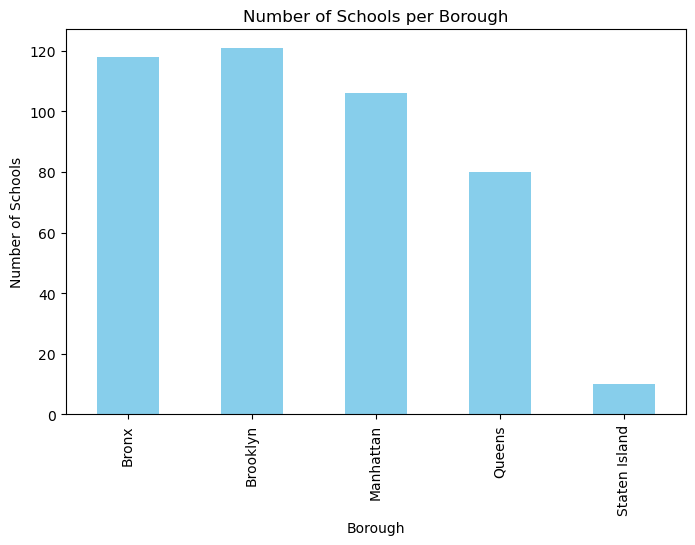

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
schools_per_borough.plot(kind="bar", color="skyblue")
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.show()

## 7. Key Insights
-Brooklyn has the highest number of schools compared to other boroughs.

-The average number of students is largest in [X Borough], suggesting bigger schools.

-Grade span distribution shows that [X Borough] tends to have more K–12 schools, while others have more specialized grade spans.